In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# About:

# Title: Heart Failure Clinical Records Dataset

# Features:

# Death Event:

In [6]:
# 1. What is the distribution of age among heart failure patients in the dataset?

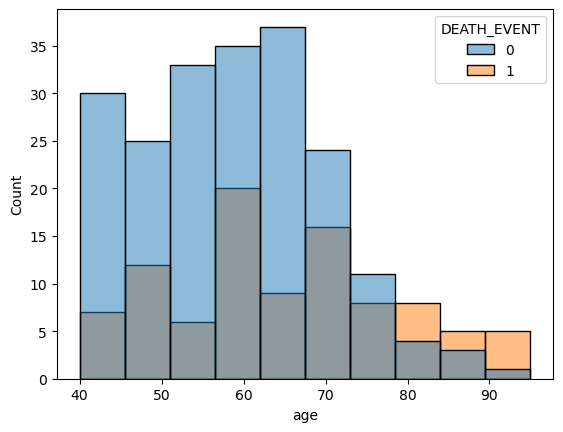

In [24]:
# df.groupby(['DEATH_EVENT'])['age'].mean().plot(kind='bar')

sns.histplot(data=df,x='age',hue='DEATH_EVENT')
plt.show()

In [25]:
# 2. How does the death rate vary with age?

In [26]:
# 3. What is the percentage of male and female patients in the dataset?

([<matplotlib.patches.Wedge at 0x13b5e2d50>,
 [Text(-0.27423916103418167, -1.1682435031085208, '1'),
  Text(0.25138579735071914, 1.070889901385919, '0')],
 [Text(-0.15997284393660594, -0.6814753768133037, '64.9%'),
  Text(0.13711952582766496, 0.5841217643923193, '35.1%')])

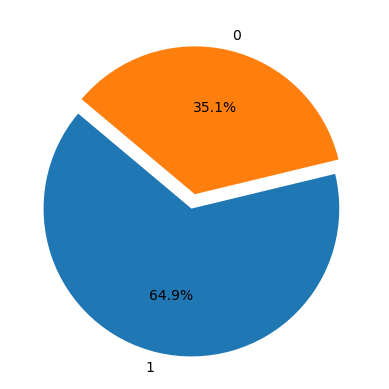

In [34]:
plt.pie(df['sex'].value_counts(),labels=df['sex'].value_counts().index,autopct='%1.1f%%',startangle=140,explode=(0.1, 0))
# Female (0) -> 35.1%
# Male (1) -> 64.9%

In [35]:
# 4. How does the platelet count vary among different age groups ?

/var/folders/2c/g3p163nx0ydgv0kwy75swnb80000gn/T/ipykernel_18990/468610429.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group'])['platelets'].mean().reset_index().plot(kind='bar')


([<matplotlib.axis.XTick at 0x13b84e1d0>,
 [Text(0, 0, '0-10'),
  Text(1, 0, '11-20'),
  Text(2, 0, '21-30'),
  Text(3, 0, '31-40'),
  Text(4, 0, '41-50'),
  Text(5, 0, '51-60'),
  Text(6, 0, '61-75'),
  Text(7, 0, '76-100')])

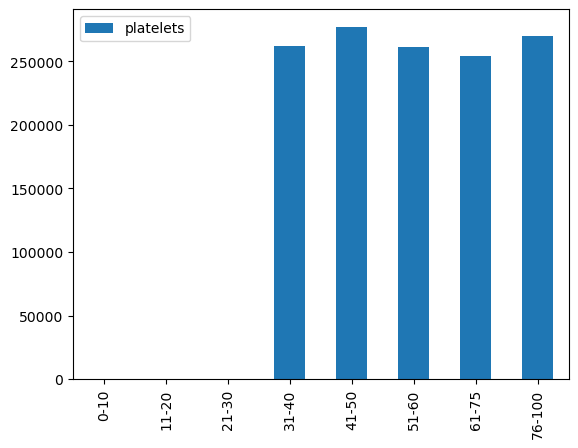

In [47]:
labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-75','76-100']
df['age_group'] = pd.cut(df['age'],bins=[0,10,20,30,40,50,60,75,100],labels=labels,right=True)
df.groupby(['age_group'])['platelets'].mean().reset_index().plot(kind='bar')
plt.xticks(ticks=[0,1,2,3,4,5,6,7],labels=labels)

In [36]:
# 5. Is there a correlation between creatinine and sodium levels in the blood ?

<Axes: >

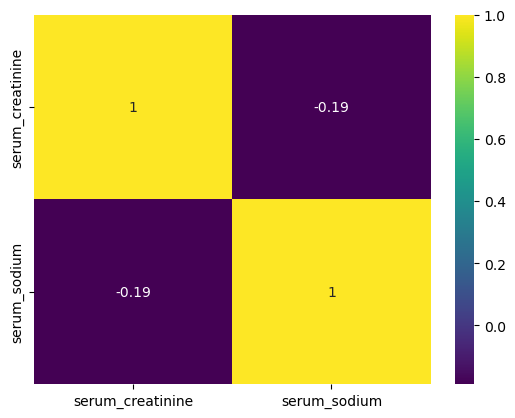

In [48]:
sns.heatmap(df[['serum_creatinine','serum_sodium']].corr(),annot=True,cmap='viridis')
# There is a low negative correlation. (Not significant enough to consider)


In [37]:
# 6. How does the prevalance of high blood pressure differ between male and female patients?

Text(0, 0.5, 'high_blood_pressure')

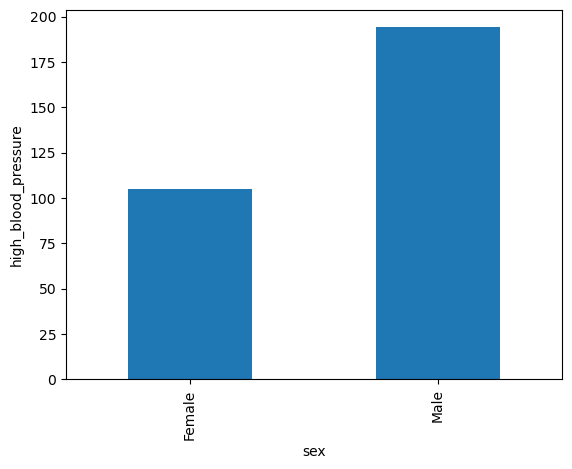

In [57]:
df.groupby(['sex'])['high_blood_pressure'].count().plot(kind='bar')
plt.xticks(ticks=[0,1],labels=['Female','Male'])
plt.ylabel("high_blood_pressure")
# Less number of Females have High BP as compared to Males.

In [38]:
# 7. What is the relationship between smoking habits and the occurrence of heart failure?

Text(0.5, 0, 'Smoking')

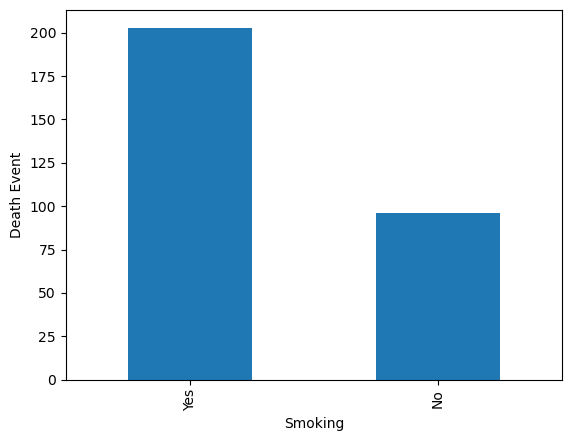

In [56]:
df.groupby(['smoking'])['DEATH_EVENT'].count().plot(kind='bar')
plt.xticks(ticks=[0,1],labels=['Yes','No'])
plt.ylabel("Death Event")
plt.xlabel("Smoking")

# People who smokes are more likely (twice likley) to die from heart failure as compared to people who don't smoke.

In [39]:
# 8. Are there any noticeable patterns in the distribution of death events across different age groups?

/var/folders/2c/g3p163nx0ydgv0kwy75swnb80000gn/T/ipykernel_18990/3376947272.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group'])['DEATH_EVENT'].count().plot(kind='bar')


<Axes: xlabel='age_group'>

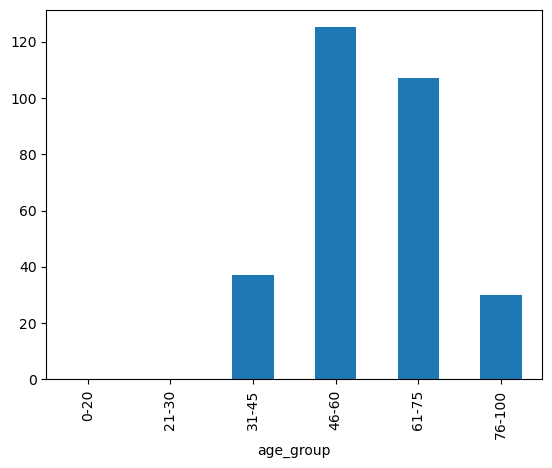

In [58]:
labels=['0-20','21-30','31-45','46-60','61-75','76-100']
df['age_group'] = pd.cut(df['age'],bins=[0,20,30,45,60,75,100],labels=labels,right=True)
df.groupby(['age_group'])['DEATH_EVENT'].count().plot(kind='bar')
# Death Events are higher in age group of 46-60 and second in age agroup of 61-75, 
# So in general it can be said that risk of death due to heart failure increases after the age of 40. 

In [40]:
# 9. Is there any significant difference in ejection fraction between patients with and without diabetes ?

<Axes: xlabel='diabetes'>

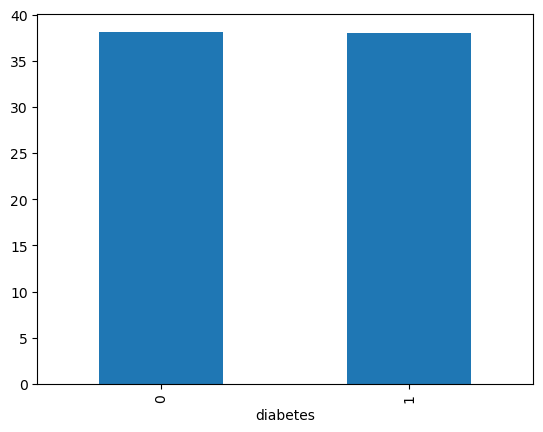

In [59]:
df.groupby(['diabetes'])['ejection_fraction'].mean().plot(kind='bar')
# No any significant difference.

In [41]:
# 10. How does the serum creatinine level vary between patients who survived and those who did not? 

([<matplotlib.axis.XTick at 0x138cc1290>,
 [Text(0, 0, 'Survived'), Text(1, 0, 'Not Survived')])

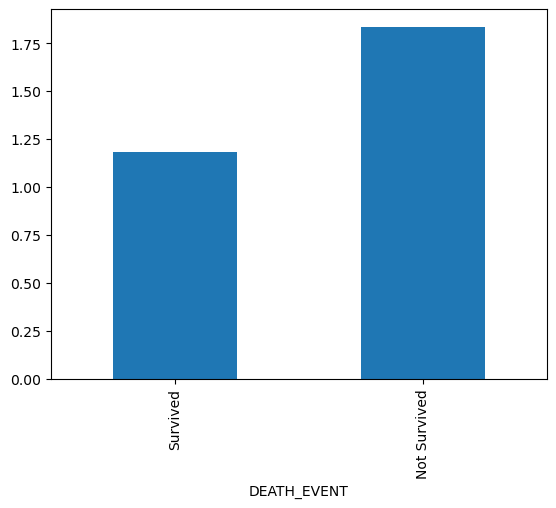

In [61]:
df.groupby(['DEATH_EVENT'])['serum_creatinine'].mean().plot(kind='bar')
plt.xticks(ticks=[0,1],labels=['Survived','Not Survived'])
# low serum creatinine in the patients those survived.